In [2]:
import os
import sys
import argparse
from os.path import dirname, realpath


In [3]:
sys.path.append("./src/")


In [7]:
%run load_Results.py

In [ ]:
M1

In [51]:
np.mean(gold0)

0.019012527634487842

In [52]:
wt00 = np.where(gold0 == 1, 1/.064, 1)

In [53]:
def weighted_temp2_scaling (logits, y, wts):
    def temperature_obj(t):
        temp_logits =   (logits + t[1]) /  t [0]
        probs = expit(temp_logits)
        return log_loss(y, probs, sample_weight=wts)    
    res = minimize (temperature_obj,x0 = [.1,.1])
    return res.x

In [54]:
alpha_00  = weighted_temp2_scaling(  logit(mp0), gold0,  wt00)


In [55]:
def temp_pred2 (alpha,  test_logit):    
    logi =  (test_logit + alpha[1])/ alpha[0]     
    proba = expit ( logi   ) #*tt.x[5]    
    return proba

In [56]:
cal_00 = temp_pred2(alpha_00, logit(mp0) )

In [57]:
M['cal1'] = cal_00.astype(float)
cM1, cM2, cM3, cM4 = get_4Ms(M)

(array([1081., 1694., 2017., 2306., 2514., 2416., 2034., 1370.,  523.,
         105.]),
 array([0.02239042, 0.09057304, 0.15875565, 0.22693827, 0.29512089,
        0.3633035 , 0.43148612, 0.49966874, 0.56785135, 0.63603397,
        0.70421659]),
 <BarContainer object of 10 artists>)

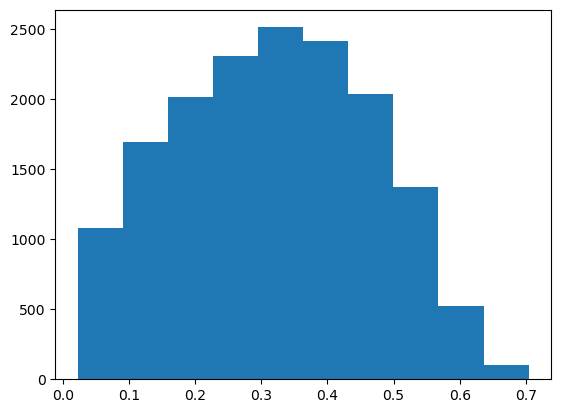

In [59]:
cM1['cal1']
plt.hist(cM1['cal1'])

In [60]:
w01 = 1/ cM1['cal1']
w02 = 1/ cM2['cal1']
w03 = 1/ cM3['cal1']
w04 = 1/ cM4['cal1']


(array([1.1305e+04, 2.8000e+01, 1.7000e+01, 1.0000e+01, 5.0000e+00,
        3.0000e+00, 4.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([1.81981954e+00, 3.89963338e+02, 7.78106857e+02, 1.16625038e+03,
        1.55439390e+03, 1.94253741e+03, 2.33068093e+03, 2.71882445e+03,
        3.10696797e+03, 3.49511149e+03, 3.88325501e+03]),
 <BarContainer object of 10 artists>)

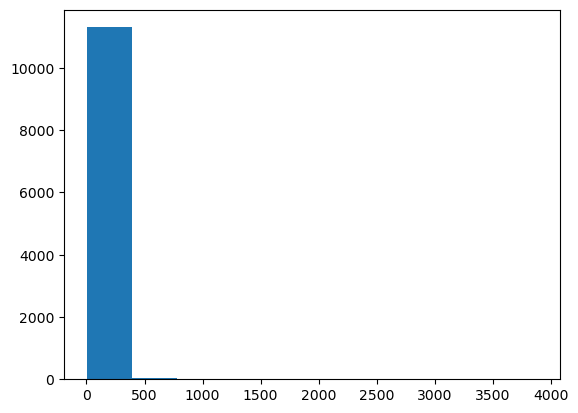

In [73]:
plt.hist(wts4)

In [61]:
wts1 = np.where(gold1 == 1, w01/np.mean(gold1), w01)
wts2 = np.where(gold2 == 1, w02/np.mean(gold2), w02)
wts3 = np.where(gold3 == 1, w03/np.mean(gold3), w03)
wts4 = np.where(gold4 == 1, w04/np.mean(gold4), w04)

In [81]:
wts1 =  w01
wts2 =  w02
wts3 =  w03
wts4 =  w04

In [82]:
def temperature_multi_w(l1, l2,l3,l4, y1, y2, y3, y4, w1, w2, w3, w4):
    def temperature_obj(t):
        logi_1 = (l1 +  t[1])  / t[5] 
        logi_2 = (l2 +  t[2])  / t[6] 
        logi_3 = (l3 +  t[3])  / t[7] 
        logi_4 = (l4 +  t[4])  / t[8] 
        
        p1  = expit (t[0]+   logi_1  )  
        p2  = expit ( t[0] +  logi_2  )  
        p3  = expit (t[0] +  logi_3  )  
        p4  = expit ( t[0] +  logi_4  ) 
        total_loss=log_loss(y1,p1,sample_weight=w1)+log_loss(y2,p2,sample_weight=w2)+ log_loss(y3,p3,sample_weight=w3)+log_loss(y4,p4,sample_weight=w4)        
        return   total_loss
    r = minimize (temperature_obj, x0 = [.1, .1, .1,.1, 
                                         .1, .1,.1, .1,.1  ] )    
    return  r

In [84]:
tt  = temperature_multi_w( logit(mp1), logit(mp2), logit(mp3), logit(mp4),
                          gold1, gold2, gold3, gold4, wts1, wts2, wts3, wts4  )

In [85]:
def temp_pred  ( j1,j2, test_logit):    
    logi =  ( test_logit   + j1) / j2     
    proba = expit ( tt.x[0] + logi   )  
    return proba

In [86]:
cal_1 = temp_pred(tt.x[1],tt.x[5], logit(tp1) )
cal_2 = temp_pred(tt.x[2],tt.x[6], logit(tp2) )
cal_3 = temp_pred(tt.x[3],tt.x[7], logit(tp3) )
cal_4 = temp_pred(tt.x[4],tt.x[8], logit(tp4) )

In [87]:
y1, p1 = compute_calibration_curve(M_test1['golds'], cal_1 )
y2, p2 = compute_calibration_curve(M_test2['golds'], cal_2 )
y3, p3 = compute_calibration_curve(M_test3['golds'], cal_3 )
y4, p4 = compute_calibration_curve(M_test4['golds'], cal_4 )


(array([4.702e+03, 3.755e+03, 1.642e+03, 7.940e+02, 4.080e+02, 2.200e+02,
        1.060e+02, 4.000e+01, 1.000e+01, 4.000e+00]),
 array([0.00187859, 0.00539711, 0.00891563, 0.01243415, 0.01595266,
        0.01947118, 0.0229897 , 0.02650822, 0.03002674, 0.03354526,
        0.03706378]),
 <BarContainer object of 10 artists>)

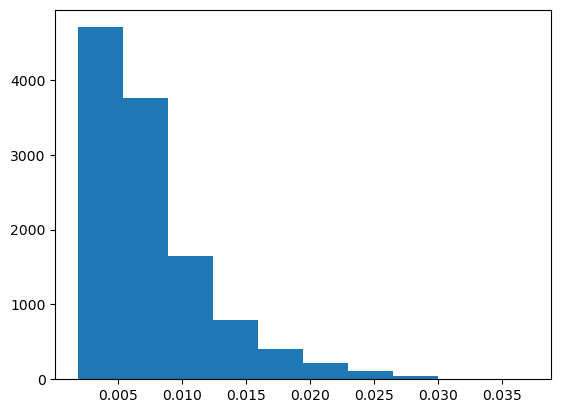

In [89]:
plt.hist(cal_4)

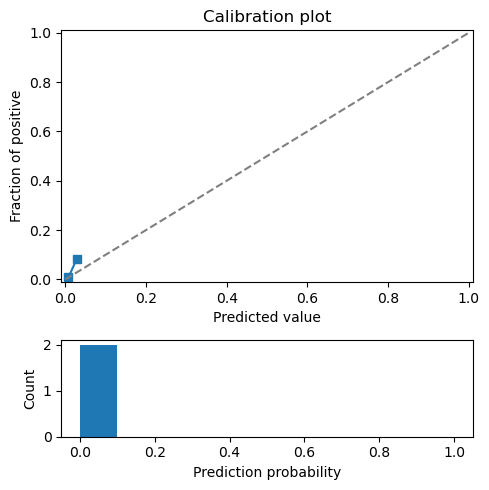

In [88]:
plotter(p4, y4)

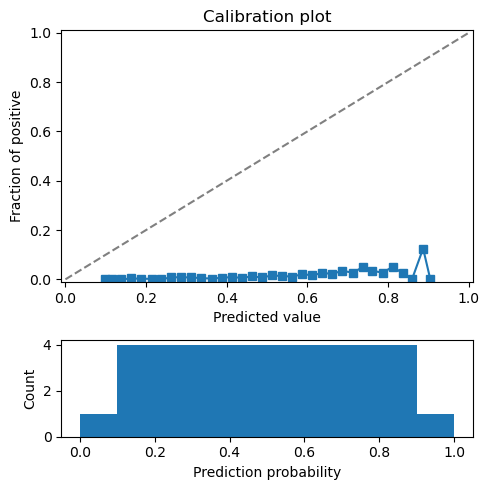

In [80]:
plotter(p3, y3)

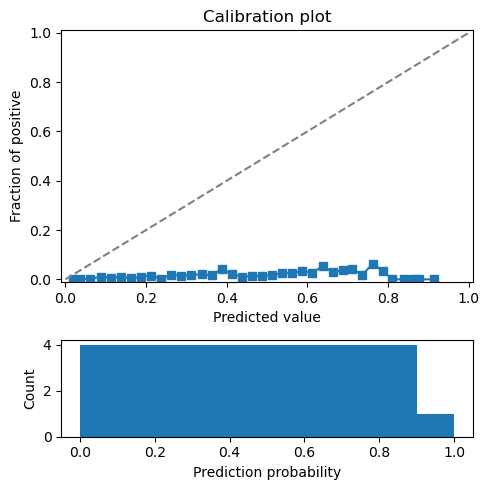

In [41]:
plotter(p2, y2)

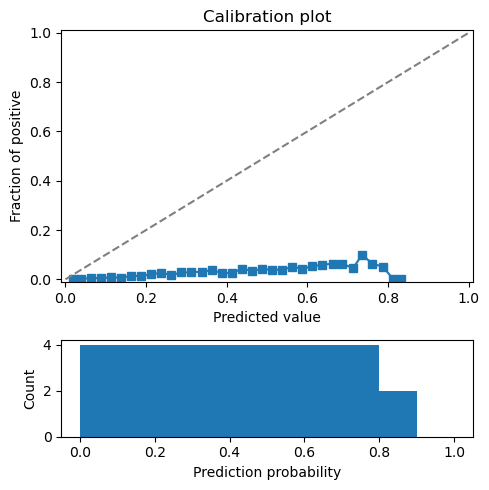

In [42]:
plotter(p1, y1)

In [20]:
import sklearn
from sklearn.metrics import confusion_matrix

In [224]:
sklearn.metrics.roc_auc_score(tgold3,  tc3 , average = 'samples')


0.6854529873329583

In [230]:
sklearn.metrics.roc_auc_score(tgold4,  tc4 , average = 'samples')


0.7072423069302404

In [225]:
sklearn.metrics.roc_auc_score(tgold1,  tc1 , average = 'samples')


0.6480031999535442

In [226]:
( confusion_matrix (tgold1,  tc1>.5) )

array([[8111, 7408],
       [ 145,  361]], dtype=int64)

In [227]:
( confusion_matrix (tgold2,  tc2>.5) )

array([[12250,  1605],
       [  149,    50]], dtype=int64)

In [228]:
( confusion_matrix (tgold3,  tc3>.5) )

array([[12405,    42],
       [  130,     2]], dtype=int64)

In [229]:
( confusion_matrix (tgold4,  tc4>.5) )

array([[10584,   128],
       [   94,     4]], dtype=int64)

In [231]:
( confusion_matrix (tgold1,  tp1>.05) )

array([[ 1657, 13862],
       [   10,   496]], dtype=int64)

In [227]:
( confusion_matrix (tgold2,  tc2>.5) )

array([[12250,  1605],
       [  149,    50]], dtype=int64)

In [228]:
( confusion_matrix (tgold3,  tc3>.5) )

array([[12405,    42],
       [  130,     2]], dtype=int64)

In [229]:
( confusion_matrix (tgold4,  tc4>.5) )

array([[10584,   128],
       [   94,     4]], dtype=int64)

In [67]:
def temperature_multi_w5 (l1, l2,l3,l4, y1, y2, y3, y4, w1, w2, w3, w4):
    def temperature_obj(t):
        logi_1 = (l1 +  t[1])  
        logi_2 = (l2 +  t[2])   
        logi_3 = (l3 +  t[3])   
        logi_4 = (l4 +  t[4])  
        
        p1  = expit (t[0]*   logi_1  )  
        p2  = expit ( t[0] *  logi_2  )  
        p3  = expit (t[0] *  logi_3  )  
        p4  = expit ( t[0] *  logi_4  ) 
        total_loss=log_loss(y1,p1,sample_weight=w1)+log_loss(y2,p2,sample_weight=w2)+ log_loss(y3,p3,sample_weight=w3)+log_loss(y4,p4,sample_weight=w4)        
        return   total_loss
    r = minimize (temperature_obj, x0 = [.1, .1, .1,.1, 
                                         .1 ] )    
    return  r

In [68]:
tt  = temperature_multi_w5( logit(mp1), logit(mp2), logit(mp3), logit(mp4),
                          gold1, gold2, gold3, gold4, wts1, wts2, wts3, wts4  )

In [70]:
def temp_pred  ( j1, test_logit):    
    logi =  ( test_logit   + j1)   
    proba = expit ( tt.x[0] * logi   )  
    return proba

In [71]:
cal_1 = temp_pred(tt.x[1] , logit(tp1) )
cal_2 = temp_pred(tt.x[2],  logit(tp2) )
cal_3 = temp_pred(tt.x[3],  logit(tp3) )
cal_4 = temp_pred(tt.x[4],  logit(tp4) )

In [72]:
y1, p1 = compute_calibration_curve(M_test1['golds'], cal_1 )
y2, p2 = compute_calibration_curve(M_test2['golds'], cal_2 )
y3, p3 = compute_calibration_curve(M_test3['golds'], cal_3 )
y4, p4 = compute_calibration_curve(M_test4['golds'], cal_4 )


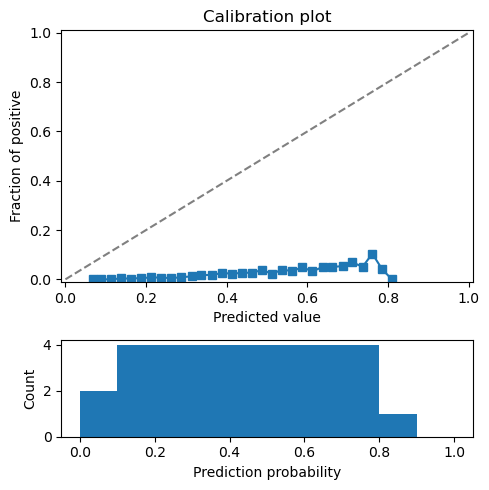

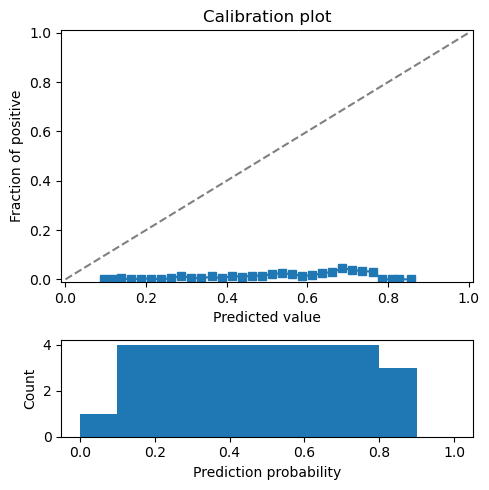

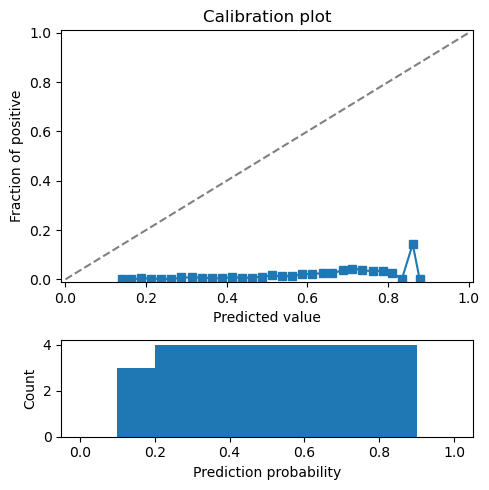

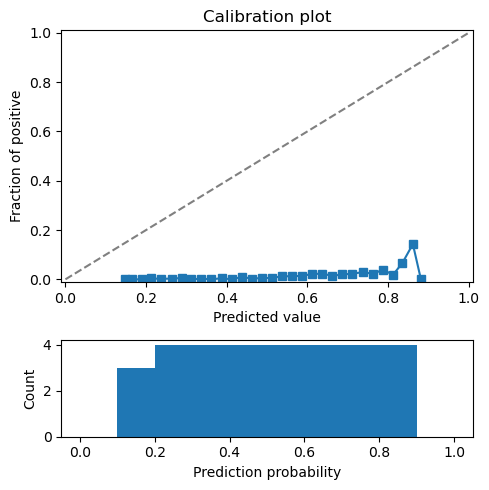

In [73]:
plotter(p1, y1)
plotter(p2, y2)
plotter(p3, y3)
plotter(p4, y4)